In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install pandas numpy matplotlib.pyplot seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [16]:
new_df=pd.read_csv(r"C:\Users\nithi\Downloads\cleaned_new_df-25-02.csv")

In [17]:
new_df.head(5)

,PlanId,BenefitName,Explanation,Cleaned_Text,Explanation_Length,Cleaned_Text_Length,Cleaned_Text_2
0,21989ak0030001-00,routine dental services (adult),see policy for other limits,limit,5,5,limit
1,21989ak0030001-00,dental check-up for children,see policy for limits,limit,5,5,limit
2,21989ak0030001-00,basic dental care - child,see policy for limits,limit,5,5,limit
3,21989ak0030001-00,orthodontia - child,for medically necessary only,NaN,0,0,NaN
4,21989ak0030001-00,major dental care - child,see policy for limits,limit,5,5,limit


In [18]:
# Step: drop NaN of Explanation with respective rows

new_df = new_df.dropna(subset=['Explanation'])
new_df.head(20)


,PlanId,BenefitName,Explanation,Cleaned_Text,Explanation_Length,Cleaned_Text_Length,Cleaned_Text_2
0,21989ak0030001-00,routine dental services (adult),see policy for other limits,limit,5,5,limit
1,21989ak0030001-00,dental check-up for children,see policy for limits,limit,5,5,limit
2,21989ak0030001-00,basic dental care - child,see policy for limits,limit,5,5,limit
3,21989ak0030001-00,orthodontia - child,for medically necessary only,NaN,0,0,NaN
4,21989ak0030001-00,major dental care - child,see policy for limits,limit,5,5,limit
5,21989ak0030001-00,basic dental care - adult,see policy for other limits,limit,5,5,limit
6,21989ak0030001-00,major dental care - adult,see policy for other limits,limit,5,5,limit
7,21989ak0030001-01,routine dental services (adult),see policy for other limits,limit,5,5,limit
8,21989ak0030001-01,dental check-up for children,see policy for limits,limit,5,5,limit
9,21989ak0030001-01,basic dental care - child,see policy for limits,limit,5,5,limit


In [19]:
new_df.describe()

,Explanation_Length,Cleaned_Text_Length
count,321519.000000,321519.000000
mean,16.781627,16.781627
std,21.426146,21.426146
min,0.000000,0.000000
25%,5.000000,5.000000
50%,12.000000,12.000000
75%,21.000000,21.000000
max,250.000000,250.000000


In [20]:
print("Number of rows:", len(new_df),"Number of columns:", len(new_df.columns))


Number of rows: 321519 Number of columns: 7


In [21]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove hashtag symbol
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s\d]', '', text)  # Remove punctuation but keep numbers
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & stopword removal
    return ' '.join(words)


# Apply cleaning function to 'Text' column
new_df['Cleaned_Text'] = new_df['Explanation'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [22]:
new_df['Cleaned_Text'].head(20)

0        see policy limit
1        see policy limit
2        see policy limit
3     medically necessary
4        see policy limit
5        see policy limit
6        see policy limit
7        see policy limit
8        see policy limit
9        see policy limit
10    medically necessary
11       see policy limit
12       see policy limit
13       see policy limit
14       see policy limit
15       see policy limit
16       see policy limit
17    medically necessary
18       see policy limit
19       see policy limit
Name: Cleaned_Text, dtype: object

In [23]:
new_df['Cleaned_Text'].unique()

array(['see policy limit', 'medically necessary',
       'medically necessary orthodontia covered', ...,
       'dental coverage momentum dental network provider medically necessary',
       'dental coverage momentum dental network provider basic major dental cant exceed 1000',
       'service covered hormone therapy gender affirming service surgery'],
      shape=(1272,), dtype=object)

# most commonly occuring words

In [24]:
freq= pd.Series(" ".join(new_df['Cleaned_Text']).split()).value_counts()


In [25]:
freq_df= pd.DataFrame({'Word': freq.index, 'Frequency': freq.values})

freq

benefit                 167154
service                 160626
per                      96549
visit                    90337
may                      87507
                         ...  
ii                           2
iii                          2
cleaningsextractions         2
365day                       1
180day                       1
Name: count, Length: 2058, dtype: int64

In [26]:
freq_df.to_csv('word_frequencies-3.csv', index=False)

In [27]:
# Step: create a bar plot for word-frequencies-3 csv file take the threshiold-20,000

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the word frequencies data
freq_df = pd.read_csv('word_frequencies-3.csv')

# Set the threshold
threshold = 5000

# Filter words based on the threshold
filtered_freq_df = freq_df[freq_df['Frequency'] >threshold]

# Create the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Word', y='Frequency', data=filtered_freq_df.head(20)) # Plot only the top 20
plt.xticks(rotation=90)
plt.title('Word Frequencies (Threshold > {})'.format(threshold))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
freq_df.describe()

,Frequency
count,2058.000000
mean,2769.760447
std,9367.080198
min,1.000000
25%,90.250000
50%,360.000000
75%,1576.750000
max,167154.000000


In [ ]:
# Step: make the stop word list from word-frequencies-3 file

import pandas as pd

# Load the word frequencies data
freq_df = pd.read_csv('word_frequencies-3.csv')

# Set the threshold (adjust as needed)
threshold = 10  # Example: Words appearing more than 10 times

# Filter words based on the threshold
stop_words_df = freq_df[freq_df['Frequency'] > threshold]

# Extract the stop words
stop_words_list = stop_words_df['Word'].tolist()

# Now you have the stop_words_list
print(stop_words_list)


# Example of how to use this list with your cleaning function:

def clean_text(text, stop_words=stop_words_list):
    # ... (rest of your clean_text function)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & stopword removal
    return ' '.join(words)


['benefit', 'service', 'per', 'visit', 'may', 'covered', 'therapy', 'see', 'cost', 'drug', 'care', 'outpatient', 'detail', 'limit', 'member', 'plan', 'required', 'limited', 'apply', 'year', 'facility', 'prior', 'authorization', 'medical', 'coverage', 'book', 'share', 'available', 'supply', 'subject', 'hospital', 'deductible', 'surgery', 'treatment', 'generic', 'necessary', 'pharmacy', 'physical', 'inpatient', 'charge', 'network', 'combined', 'preauthorization', 'office', 'prescription', 'provided', 'day', '1', 'emergency', 'occupational', 'medically', 'responsible', 'coinsurance', 'setting', 'include', 'information', 'refer', 'copay', 'please', 'provider', 'includes', 'must', 'including', 'speech', 'maximum', 'rehabilitation', 'received', 'admission', 'additional', 'using', 'chiropractic', 'health', 'following', 'increase', 'booklet', 'hospitalbased', '30', 'mastectomy', 'condition', 'breast', 'home', 'sharing', 'eligible', 'based', 'certain', 'listed', 'manipulation', 'tier', 'frame',

In [ ]:
stop_words_df

,Word,Frequency
0,benefit,167154
1,service,160626
2,per,96549
3,visit,90337
4,may,87507
...,...,...
2008,cleanings2,12
2009,depended,12
2010,visis,12
2011,subesquent,12


In [ ]:
#

# Create a set of health insurance keywords for faster lookups.
health_insurance_keywords = set([
    "Ancillary charge",
    "Assignment of benefits",
    "Capitated service",
    "Charge",
    "Claim number",
    "Co-insurance",
    "Co-payment",
    "Coordination of benefits",
    "Cost-sharing",
    "CPT codes",
    "Covered benefits",
    "Deductible",
    "Dependent",
    "Diagnosis codes",
    "Exclusions",
    "Exclusive provider organization",
    "Explanation of benefits",
    "Flexible spending account",
    "Health maintenance organization",
    "Health savings account",
    "Health reimbursement account",
    "In-network",
    "Letter of medical necessity",
    "Lifetime maximum",
    "Managed care organization",
    "National provider identifier",
    "Non-covered procedure",
    "Non-preferred provider",
    "Out-of-network",
    "Out-of-pocket expenses",
    "Plan year",
    "Physician groups",
    "Pre-existing condition",
    "Preferred provider",
    "Preferred provider organization",
    "Point of service"
])

# Filter the dataframe to keep only rows where the 'Word' is in the health_insurance_keywords set.
filtered_stop_words_df = stop_words_df[stop_words_df['Word'].isin(health_insurance_keywords)]

# Display the filtered dataframe (optional)
#print(filtered_stop_words_df)


In [ ]:
non_health_terms = [
    # Environmental terms
    "groundwater",

    # Generic locations/structures
    "floor",
    "roof",
    "entry",

    # Directional/positional terms
    "next",
    "turn",
    "force",

    # Generic objects
    "mirror",
    "box",
    "hook",

    # Generic descriptors
    "flat",
    "fine",
    "convenient",
    "faster",
    "easier",
    "safe",

    # Generic actions/states
    "saving",
    "scratch",
    "fall",
    "shift",
    "download",
    "fill",
    "choose",
    "save",
    "join",
    "making",
    "getting",
    "experienced",

    # Time-related general terms
    "starting",
    "become",
    "remains",
    "often",
    "currently",

    # Generic quantities/measures
    "various",
    "multiple",
    "combined",
    "variety",
    "amount",
    "count",
    "substantial",
    "unique",

    # Generic status terms
    "approved",
    "determined",
    "completed",
    "selected",
    "stored",
    "locked",

    # Generic organizational terms
    "category",
    "section",
    "division",
    "component",

    # Communication terms
    "guide",
    "link",
    "address",
    "call",
    "chat",
    "talking",

    # Generic personal references
    "man",
    "anyone",
    "others",
    "person",

    # Business/administrative (non-healthcare specific)
    "company",
    "capital",
    "funding",
    "consumer",
    "account",
    "mobile",
    "app",

    # Generic qualifiers
    "best",
    "good",
    "appropriate",
    "reasonable",
    "significant",
    "effective",
    "commonly",

    # Generic processes
    "process",
    "development",
    "coordination",
    "selection",
    "modification",

    # Basic attributes
    "name",
    "value",
    "quality",
    "feature",
    "model",

    # Generic measurements
    "grade",
    "level",
    "rate",
    "distance",

    # Generic states/conditions
    "normal",
    "natural",
    "standard",
    "basis",

    # Generic actions
    "create",
    "ensure",
    "maintain",
    "perform",
    "provide",
    "offer",
    "access",
    "change",
    "check",
    "review",
    "search"
]

In [ ]:
# Step: using the non_health_terms list remove words in the Cleaned_Text data

def clean_text(text, stop_words=stop_words_list, non_health_terms=non_health_terms):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove hashtag symbol
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s\d]', '', text)  # Remove punctuation but keep numbers
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word not in non_health_terms]  # Lemmatization & stopword removal
    return ' '.join(words)

# Apply the updated cleaning function
new_df['Cleaned_Text'] = new_df['Explanation'].apply(clean_text)
new_df['Cleaned_Text'].head(20)


,Cleaned_Text
0,for other limit
1,for limit
2,for limit
3,for only
4,for limit
5,for other limit
7,for other limit
9,for other limit
10,for limit
11,for limit


In [ ]:
# Step: remove causal english stop words from new_df['Cleaned_Text']

import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

new_df['Cleaned_Text'] = new_df['Cleaned_Text'].apply(remove_stopwords)
new_df['Cleaned_Text'].head(20)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Cleaned_Text
0,limit
1,limit
2,limit
3,
4,limit
5,limit
7,limit
9,limit
10,limit
11,limit


# word frequency distribution

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize text
all_words = ' '.join(new_df['Cleaned_Text']).split()
word_freq = Counter(all_words)
word_freq.most_common(20)  # Top 20 words


[('service', 144797),
 ('benefit', 66227),
 ('visit', 63085),
 ('detail', 56874),
 ('drug', 28679),
 ('limit', 20244),
 ('manipulation', 13618),
 ('frame', 13274),
 ('wa', 12483),
 ('supply', 10305),
 ('situation', 10111),
 ('month', 8306),
 ('doe', 7901),
 ('year', 7719),
 ('device', 7625),
 ('charge', 7478),
 ('condition', 7282),
 ('lens', 6627),
 ('trip', 6584),
 ('day', 6255)]

# Outlliers

In [ ]:
# Text length outliers (Corrected)
# Calculate length of text and then find quantile
new_df['Explanation_Length'] = new_df['Cleaned_Text'].str.len()
# Convert 'Cleaned_Text' column to numeric before calculating the quantile
new_df['Cleaned_Text_Length'] = pd.to_numeric(new_df['Cleaned_Text'].str.len(), errors='coerce')
long_texts_df = new_df[new_df['Explanation_Length'] > new_df['Cleaned_Text_Length'].quantile(0.95)]
long_texts_df[['Explanation', 'Cleaned_Text']] # Display Explanation and Length

,Explanation,Cleaned_Text
5476,"limit applies to exams, cleanings and fluoride...",exam cleaning film month year sealant turn ben...
5477,"limit applies to exams, cleanings and fluoride...",exam cleaning film month year sealant turn ben...
5485,"limit applies to exams, cleanings and fluoride...",exam cleaning film month year sealant turn ben...
5486,"limit applies to exams, cleanings and fluoride...",exam cleaning film month year sealant turn ben...
5503,"limit applies to exams, cleanings and fluoride...",exam cleaning film month year sealant turn ben...
...,...,...
1048221,supplementing with the federal definition of h...,service service skill example service service ...
1048297,supplementing with the federal definition of h...,service service skill example service service ...
1048373,supplementing with the federal definition of h...,service service skill example service service ...
1048449,supplementing with the federal definition of h...,service service skill example service service ...


# N-grams Analysis


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words=None)
# Changed 'data' to 'new_df' and 'text' to 'Cleaned_Text'
X = vectorizer.fit_transform(new_df['Cleaned_Text'])
ngrams_freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:50]

[('service service', 31980),
 ('service detail', 16590),
 ('visit visit', 15526),
 ('benefit service', 12343),
 ('wa detail', 9870),
 ('service service service', 6985),
 ('service benefit', 6971),
 ('benefit trip', 6580),
 ('frame frame', 6580),
 ('drug charge', 6428),
 ('penalty benefit', 5825),
 ('service visit', 5693),
 ('drug drug', 5081),
 ('situation wa', 5049),
 ('situation wa detail', 5049),
 ('visit benefit', 4861),
 ('visit visit visit', 4830),
 ('charge wa', 4821),
 ('charge wa detail', 4821),
 ('drug charge wa', 4821),
 ('visit service', 4622),
 ('reimbursement detail', 4505),
 ('visit benefit service', 4193),
 ('example service', 4146),
 ('benefit service visit', 3866),
 ('detail detail', 3694),
 ('service detail detail', 3694),
 ('benefit tier', 3582),
 ('benefit tier limit', 3582),
 ('level benefit', 3582),
 ('level benefit tier', 3582),
 ('tier limit', 3582),
 ('service supply', 3435),
 ('limit plan', 3397),
 ('drug situation', 3366),
 ('benefit trip detail', 3290),
 ('

In [ ]:
# Check for any inconsistent formats
new_df['Cleaned_Text_2'] = new_df['Cleaned_Text'].str.lower().str.strip()


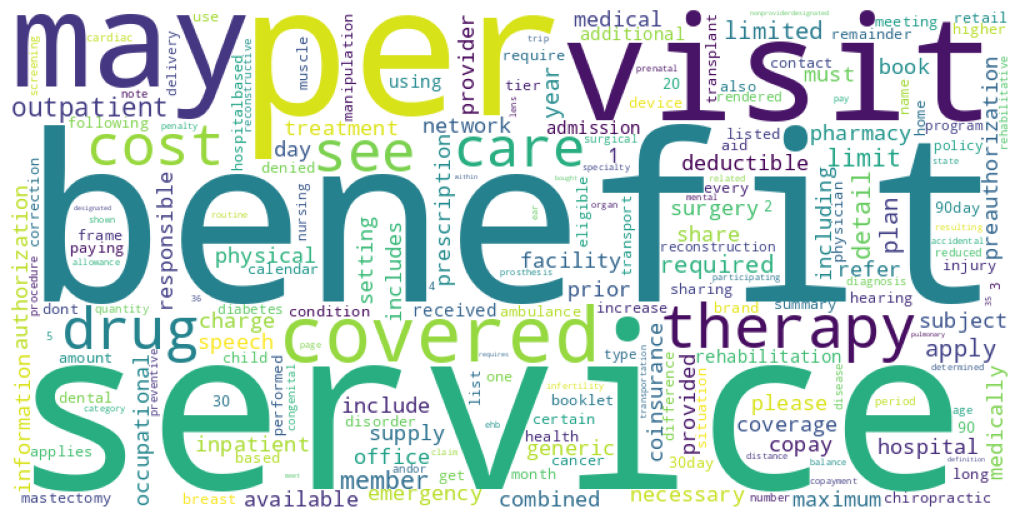

In [ ]:
# Step: freq= pd.Series(" ".join(new_df['Cleaned_Text']).split()).value_counts()[:30] create a word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
